<a href="https://colab.research.google.com/github/siaSim/keras_deeplearning/blob/main/deep2-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [10]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype("float32")/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype("float32")/255

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.2644 - accuracy: 0.9248
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1091 - accuracy: 0.9671
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0714 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0515 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0383 - accuracy: 0.9886


In [12]:
test_digits=test_images[0:10]
predictions=model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 79ms/step


array([2.3761976e-07, 3.9535443e-08, 4.5543447e-06, 2.7268950e-05,
       1.9195855e-11, 1.0265101e-08, 6.5807234e-13, 9.9996561e-01,
       1.4970771e-08, 2.2760096e-06], dtype=float32)

In [13]:
predictions[0].argmax()
predictions[0][7]
test_labels[0]

7

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9795
테스트 정확도: 0.9794999957084656


In [15]:
import numpy as np
x=np.array(12)
x

array(12)

In [16]:
x.ndim

0

In [17]:
x=np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [18]:
x.ndim

1

In [19]:
x=np.array([[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]])
x.ndim

2

**2.2.4   랭크-3 텐서와 더 높은 랭크의 텐서**

In [20]:
x=np.array([[[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]],
            [[5,78,2,34,0],
            [6,79,3,35,1],
            [7,80,4,36,2]],
            [[5,78,2,34,0],
             [6,78,2,34,1],
             [7,80,4,36,2]]])
x.ndim

3

**2.2.5 핵심속성**

In [21]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

In [22]:
train_images.ndim

3

In [23]:
train_images.shape

(60000, 28, 28)

In [24]:
train_images.dtype

dtype('uint8')

↑8비트 정수형 랭크-3 텐서
28x28 크기의 정수 행렬 6만개가 있는 배열
행렬의 각 원소는 0에서 255사이의 값

↓랭크-3텐서에서 다섯번째 샘플을 맷플롯립 라이브러리를 사용한다.

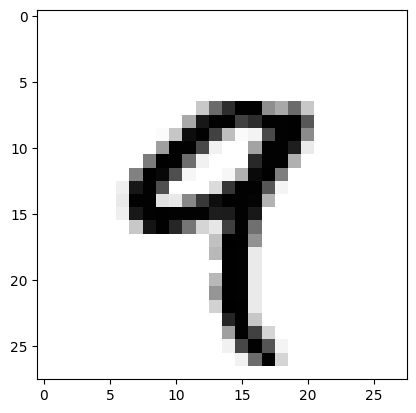

In [25]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [26]:
train_labels[4]

9

**2.2.6 넘파이로 텐서 조작하기**

11번째에서 101번째까지 숫자를 선택하여 (90,28,28)크기의 배열 만들기

In [27]:
my_slice=train_images[10:100]
my_slice.shape

(90, 28, 28)

각 배열의 축을 따라 슬랑ㅣ싱의 시작 인덱스와 마지막 인덱스를 지정

In [28]:
my_slice=train_images[10:100, : , :]
my_slice.shape

(90, 28, 28)

In [29]:
my_slice=train_images[10:100, 0:20, 0:28]
my_slice.shape

(90, 20, 28)

In [30]:
my_slice = train_images

이미지의 오른쪽 아래 14x14 픽셀을 선택

In [31]:
my_slice = train_images[:, 14:,14:]

음수 인덱스 사용
현대 축의 끝에서 상대적 위치 나타냄
14x14 픽셀 조각을 이미지에서 잘라냄

In [32]:
my_slice = train_images[:, 7:-7, 7:-7]

**2.2.7 배치데이터**

In [33]:
batch = train_images[:128]

In [34]:
batch = train_images[128:256]

In [35]:
n=3
batch=train_images[128*n:128*(n+1)]

**2.3**

In [36]:
keras.layers.Dense(512, activation="relu")

In [37]:
def native_relu(x):
  assert len(x.shape) == 2
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j]=max(x[i,j],0)
  return x

In [38]:
def native_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j]+=y[i,j]
  return x

In [39]:
import numpy as np
import time

x=np.random.random((20,100))
y=np.random.random((20,100))

t0=time.time()
for _ in range(1000):
 z = x + y
 z=np.maximum(z, 0.)
print("걸린시간 : {0:.2f} s".format(time.time()-10))

걸린시간 : 1686110537.74 s


In [40]:
t0=time.time()
for _ in range(1000):
 z = native_add(x, y) #책 오류 수정
 z = native_relu(z)
print("걸린시간 : {0:.2f} s".format(time.time()-10))

걸린시간 : 1686110539.34 s


2.3.2

In [41]:
def native_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j]+= y[j]
  return x

In [42]:
import numpy as np
x=np.random.random((64,3,32,10))
y=np.random.random((32,10))
z=np.maximum(x,y)

**2.3.3 텐서 곱셈**

In [43]:
x=np.random.random((32,))
y=np.random.random((32,))
z=np.dot(x,y)

2개의 벡터 x와 y의 점곱

In [44]:
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z=0.
  for i in range(x.shape[0]):
    z+=x[i]*y[i]
  return z

In [45]:
def naive_vector_dot(x, y):
  assert len(x.shape) == 2 #넘파이행렬
  assert len(y.shape) == 1 #넘파이 벡터
  assert x.shape[0] == y.shape[0] #x의 두번째 차원이 y의 첫번째 차원과 같아야한다.
  z=np.zeros(x.shape[0]) #x의 행과 같은 크기의 0이 채워진 벡터
  for i in range(x.shape[0]):
    for j in range(x.shape[i]):
       z[i]+=x[i,j]*y[j]
  return z

dot(x,y)와 dot(y,x)는 다르다

In [46]:
def naive_matrix_vector_dot(x, y):
   z=np.zeros(x.shape[0])
   for i in range(x.shape[0]):
    z[i]=naive_vector_dot(x[i, :], y)
   return z

In [47]:
def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]
  z=np.zeros((x.shape[0], y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x=x[i,:]
      colum_y=y[:, j]
      z[i, j]=naive_vector_dot(row_x, column_y)
  return z
  #x와 y의 접곱으로 인해 행렬이 되는 구현 

**2.3.4 텐서 크기 변환**

In [48]:
train_images=train_images.reshape((60000, 28*28))

In [49]:
x=np.array([[0.,1.],
           [2.,3.],
           [4.,5.]])

In [50]:
x.shape

(3, 2)

In [51]:
x=x.reshape((6,1))

In [52]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [53]:
x=x.reshape((2,3))

In [54]:
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [55]:
x=np.zeros((300,20))

In [56]:
x=np.transpose(x)

In [57]:
x.shape

(20, 300)

**2.4.4**

In [58]:
output = relu(dot(W, input) * b)

NameError: ignored

In [ ]:
y_pred=dot(W,x)
loss_value=loss(y_pred, y_true)

In [ ]:
loss_value = loss(y_true, softmax(dot(relu(dot(input, W1)+b1),W2)+b2))

2.5.1

단순한 Dense 클래스

In [73]:
import tensorflow as tf

In [74]:
class NaiveDense:
  def __init__(self, input_size, activation):
    self.activation = activation

    w_shape = (input_size, output_size)  #랜덤한 값으로 초기화된 (input_size, output_size)크기의 행렬 W생성
    w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)

    b_shape = (input_size, ) #0으로 초기화된 (output_size,)크기의 벡터 b 생성
    b_initial_value = tf.zeros(b_shape)
    self.b = tf.Variable(b_initial_value)

  def __call__(self, inputs): #정방향 패스 수행
    return self.activation(tf.matul(inputs, self.W)+self.b)

  @property
  def weights(self): # 층의 가중치를 추출하기 위한 메서드
    return [self.W, self.b]


단순한 Sequential 클래스

In [68]:
class NaiveSequential:
  def __init__(self, layers):
    self.layers =layers

  def __call__(self, inputs):
    x=inputs
    for layer in self.layers:
      x=layer(x)
    return x

  @property
  def weights(self):
    weights=[]
    for layer in self.layers:
      weights += layer.weights
    return weights

In [69]:
# model=NaiveSequential([
#     NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
#     NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
# ])
# assert len(model.weights) == 4

배치 제너레이터

In [70]:
import math
class BatchGenerator:
  def __init__(self, images, labels, batch_size=128):
    assert len(images) == len(labels)
    self.index = 0
    self.images=images
    self.labels = labels
    self.batch_size = batch_size
    self.num_batches=math.ceil(len(images)/batch_size)

    def next(self):
      images = self.images[self.index : self.index +self.batch_size]
      labels = self.labels[self.index : self.index +self.batch_size]
      self.index += self.batch_size
      return images, labels